In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print(f"PyTorch version: {torch.__version__}")
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("device:[%s]."%(device))

PyTorch version: 1.7.1
device:[cpu].


### DatasSet

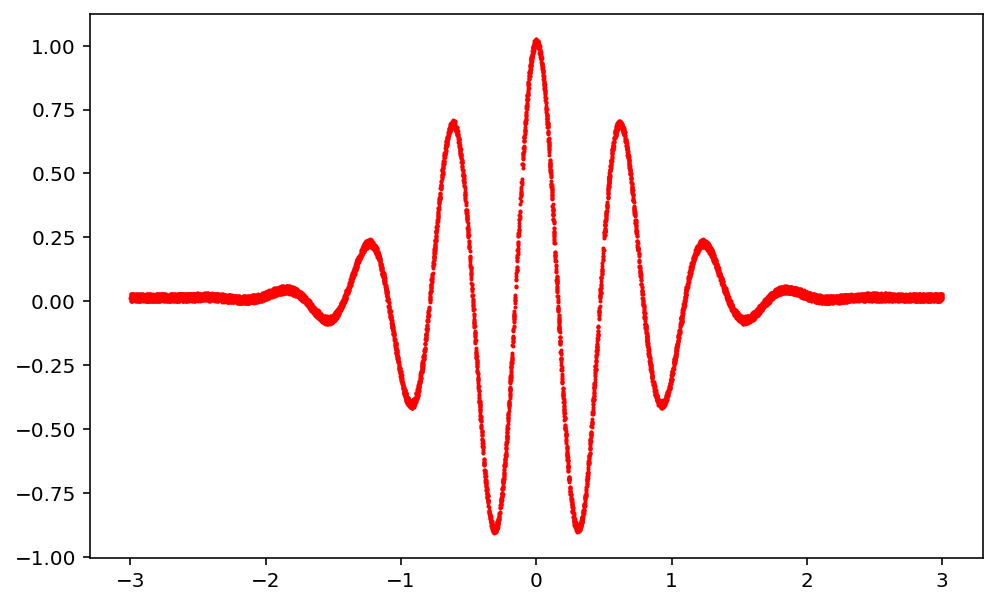

Done.


In [8]:
n_data = 10000
x_numpy = -3+6*np.random.rand(n_data,1)
y_numpy = np.exp(-(x_numpy**2))*np.cos(10*x_numpy)+3e-2*np.random.rand(n_data,1)

plt.figure(figsize=(8,5))
plt.plot(x_numpy,y_numpy,'r.',ms=2)
plt.show()
x_torch = torch.Tensor(x_numpy).to(device)
y_torch = torch.Tensor(y_numpy).to(device)
print ("Done.")

### Define Model

In [13]:
class Model(nn.Module):
    def __init__(self,name='mlp',xdim=1,hdim=[16,16],ydim=1):
        super(Model,self).__init__()
        self.name = name
        self.xdim = xdim
        self.hdims = hdims
        self.ydim = ydim
        
        self.layers = []
        prev_hdim = self.xdim
        for hdim in self.hdims:
            self.layers.append(nn.Linear(
                in_feature = prev_hdim,
                out_feature = hdim,
                bias = True     
            ))
            self.layer.append(nn.Tanh())
            prev_hdim = hdim
        self.layers.append(nn.Linear(prev_hdim,self.ydim,bias=True))
        
        
        self.net = nn.Sequential()
        for l_idx, layer in enumerate(self.layers):
            layer_name = "%s_%02d"%(type(layer).__name__.lower(),l_idx)
            self.net.add_module(layer_name,layer)
            
        selt.init_param()
        

        def init_param(self):
            for m in self.modules():
                if isinstance(m,nn.Conv2d):
                    nn.init.kaiming_normal_(m.weight)
                    nn.init.zeros_(m.bias)
                elif isinstance(m,nn.Linear):
                    nn.init.kaiming_normal_(m.weight)
                    nn.init.zeros_(m.bias)
                    
        def forward(self,x):
            return self.net(x)
    print('Done.')

Done.
